In [1]:
import requests
import numpy as np
import json
import math
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
def list_string(arr):
    return f"{arr}".replace("'",'"')

In [52]:
def get_some_times(route, dt_params=(2018,10,15,0,1,0), hours=20, tz_offset=7):
    route_14=[]
    
    timestamp=int(datetime(*dt_params).timestamp())*1000
    
    for i in range(hours):
        start_time = timestamp + i*36e5
        end_time   = start_time + 36e5

        query = f"""{{
          trynState(agency: "muni", startTime: "{start_time}", endTime: "{end_time}", routes: {list_string([route])}) {{
            agency
            startTime
            routes {{
              routeStates {{
                vtime
                vehicles {{
                  vid
                }}
              }}
            }}
          }}
        }}
        """ # Braces need to be doubled for f-string

        query_url = "https://06o8rkohub.execute-api.us-west-2.amazonaws.com/dev/graphql?query="+query

        print('Getting data...',i)
        r = requests.get(query_url)

        print('Formatting data...')

        data = json.loads(r.text)
        if len(data['data']['trynState']['routes']):
            route_14.extend(data['data']['trynState']['routes'][0]['routeStates'])
    r14_sort=sorted(route_14, key=lambda x: int(x['vtime']))

    vids = []
    for x in r14_sort:
        for y in x['vehicles']:
            vids.append(y['vid'])
    vids=sorted(list(set(vids)))
    
    def get_hours(x):
        day=864e5
        hour=36e5
        tz=hour*tz_offset
        return (int(x['vtime'])-day*((timestamp-tz)//day)-tz)/hour
    
    print('Plotting...')
    a=[]
    b=[]
    col=[]
    
    d=[]
    e=[]
    for x in r14_sort:
        h = get_hours(x)
        d.append(h)
        e.append(len(x['vehicles']))
        
        for v in x['vehicles']:
            a.append(h)
            b.append(vids.index(v['vid']))
            col.append(int(v['vid'])%1000)
    plt.scatter(a,b,c=col,s=3)
    plt.show()
    
    plt.plot(d,e)
    plt.show()

Getting data... 0
Formatting data...
Getting data... 1
Formatting data...
Getting data... 2
Formatting data...
Getting data... 3
Formatting data...
Getting data... 4
Formatting data...
Getting data... 5
Formatting data...
Getting data... 6
Formatting data...
Getting data... 7
Formatting data...
Getting data... 8
Formatting data...
Getting data... 9
Formatting data...
Getting data... 10
Formatting data...
Getting data... 11
Formatting data...
Getting data... 12
Formatting data...
Getting data... 13
Formatting data...
Getting data... 14
Formatting data...
Getting data... 15
Formatting data...
Getting data... 16
Formatting data...
Getting data... 17
Formatting data...
Getting data... 18
Formatting data...
Getting data... 19
Formatting data...
Plotting...


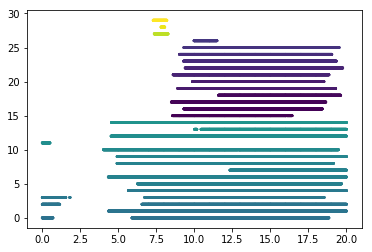

In [19]:
get_some_times('30')

Getting data... 0
Formatting data...
Getting data... 1
Formatting data...
Getting data... 2
Formatting data...
Getting data... 3
Formatting data...
Getting data... 4
Formatting data...
Getting data... 5
Formatting data...
Getting data... 6
Formatting data...
Getting data... 7
Formatting data...
Getting data... 8
Formatting data...
Getting data... 9
Formatting data...
Getting data... 10
Formatting data...
Getting data... 11
Formatting data...
Getting data... 12
Formatting data...
Getting data... 13
Formatting data...
Getting data... 14
Formatting data...
Getting data... 15
Formatting data...
Getting data... 16
Formatting data...
Getting data... 17
Formatting data...
Getting data... 18
Formatting data...
Getting data... 19
Formatting data...
Getting data... 20
Formatting data...
Getting data... 21
Formatting data...
Getting data... 22
Formatting data...
Getting data... 23
Formatting data...
Plotting...


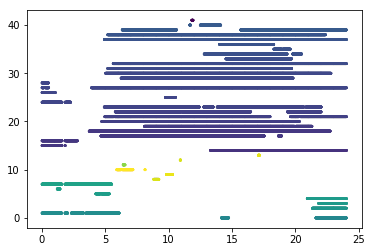

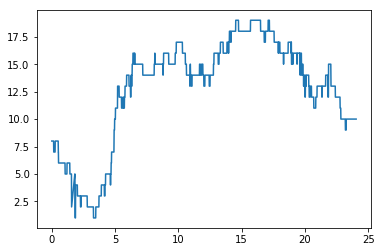

In [49]:
get_some_times('14',hours=24)

Getting data... 0
Formatting data...
Getting data... 1
Formatting data...
Getting data... 2
Formatting data...
Getting data... 3
Formatting data...
Getting data... 4
Formatting data...
Getting data... 5
Formatting data...
Getting data... 6
Formatting data...
Getting data... 7
Formatting data...
Getting data... 8
Formatting data...
Getting data... 9
Formatting data...
Getting data... 10
Formatting data...
Getting data... 11
Formatting data...
Getting data... 12
Formatting data...
Getting data... 13
Formatting data...
Getting data... 14
Formatting data...
Getting data... 15
Formatting data...
Getting data... 16
Formatting data...
Getting data... 17
Formatting data...
Getting data... 18
Formatting data...
Getting data... 19
Formatting data...
Getting data... 20
Formatting data...
Getting data... 21
Formatting data...
Getting data... 22
Formatting data...
Getting data... 23
Formatting data...
Plotting...


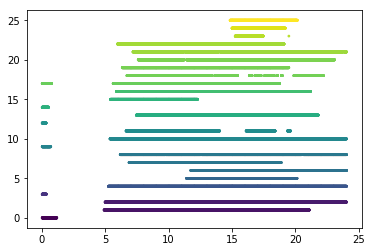

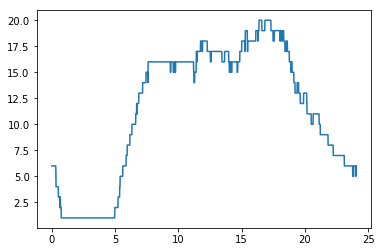

In [50]:
get_some_times('49',hours=24)

Getting data... 0
Formatting data...
Getting data... 1
Formatting data...
Getting data... 2
Formatting data...
Plotting...


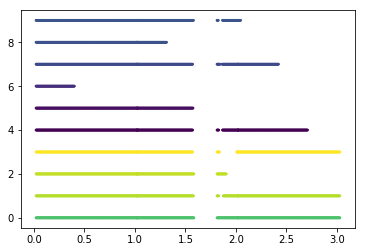

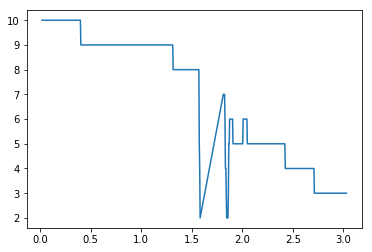

In [47]:
get_some_times('14',(2018,10,17,0,1,0),3)

In [56]:
(datetime(2018,10,16,0,0,0).timestamp()*1000)%864e5/36e5

7.0

Getting data... 0
Formatting data...
Getting data... 1
Formatting data...
Getting data... 2
Formatting data...
Getting data... 3
Formatting data...
Getting data... 4
Formatting data...
Getting data... 5
Formatting data...
Plotting...


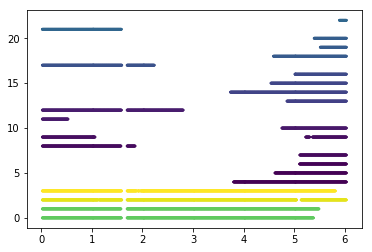

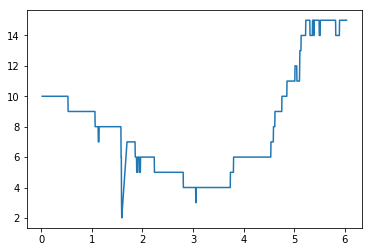

In [54]:
get_some_times('14',(2018,11,5,0,1,0),6,8)

In [80]:
datetime(1970,1,1,16,0,0).timestamp()/3600

24.0

In [83]:
datetime(2018,10,18,16,0,0).timestamp()

1539903600.0

In [84]:
datetime.fromtimestamp(1539903600)

datetime.datetime(2018, 10, 18, 16, 0)

In [85]:
datetime.now()

datetime.datetime(2018, 11, 8, 12, 47, 2, 83432)